# Stroke Prediction - Binary Classification of Strokes Given Patient Characteristics

## 1. Initial data exploration and visualizations

In [98]:
import numpy as np
import pandas as pd
import mltools as ml

df1 = pd.read_csv("data/healthcare-dataset-stroke-data.csv")
df2 = pd.read_csv("data/train.csv")
df = pd.concat([df1, df2])
print(df.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


### Visualizing distribution of features

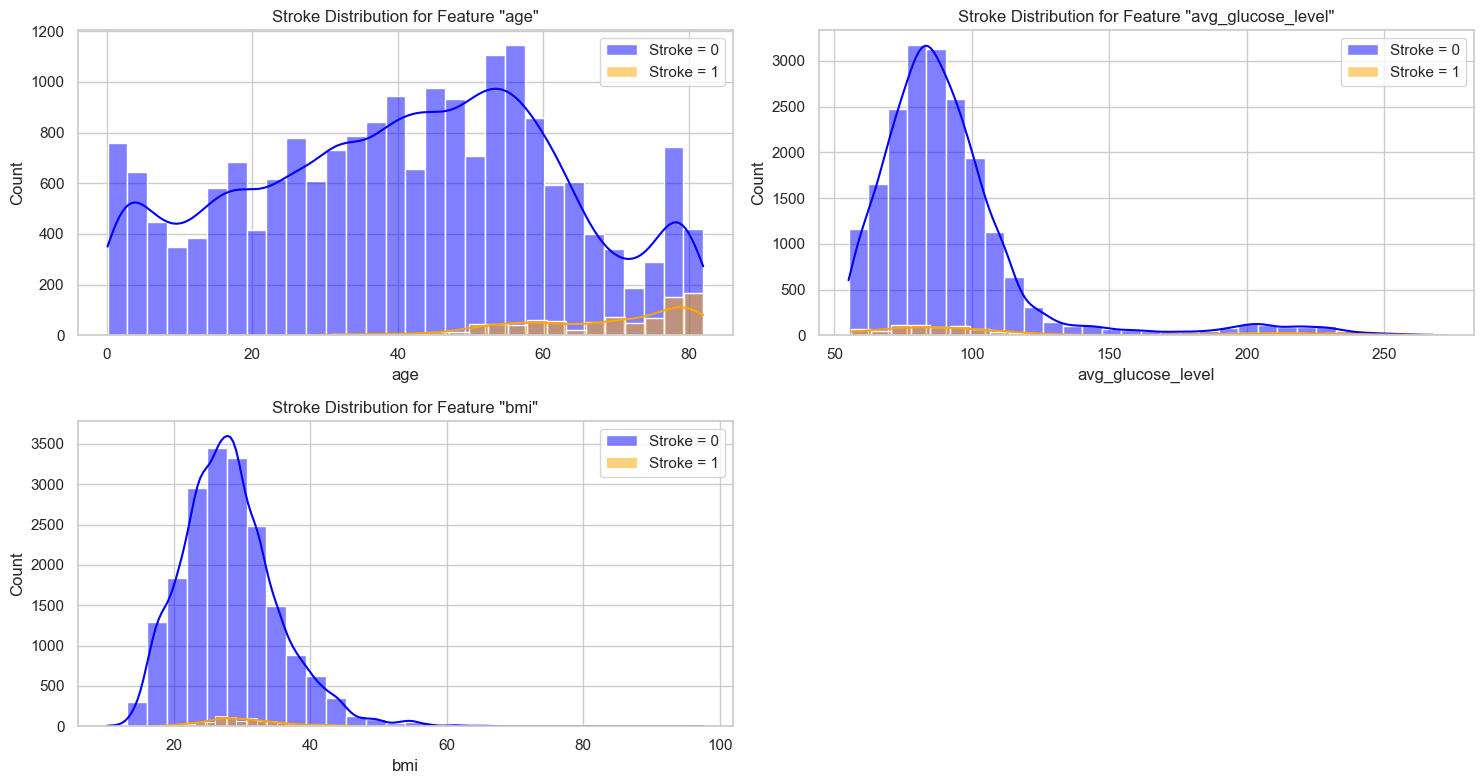

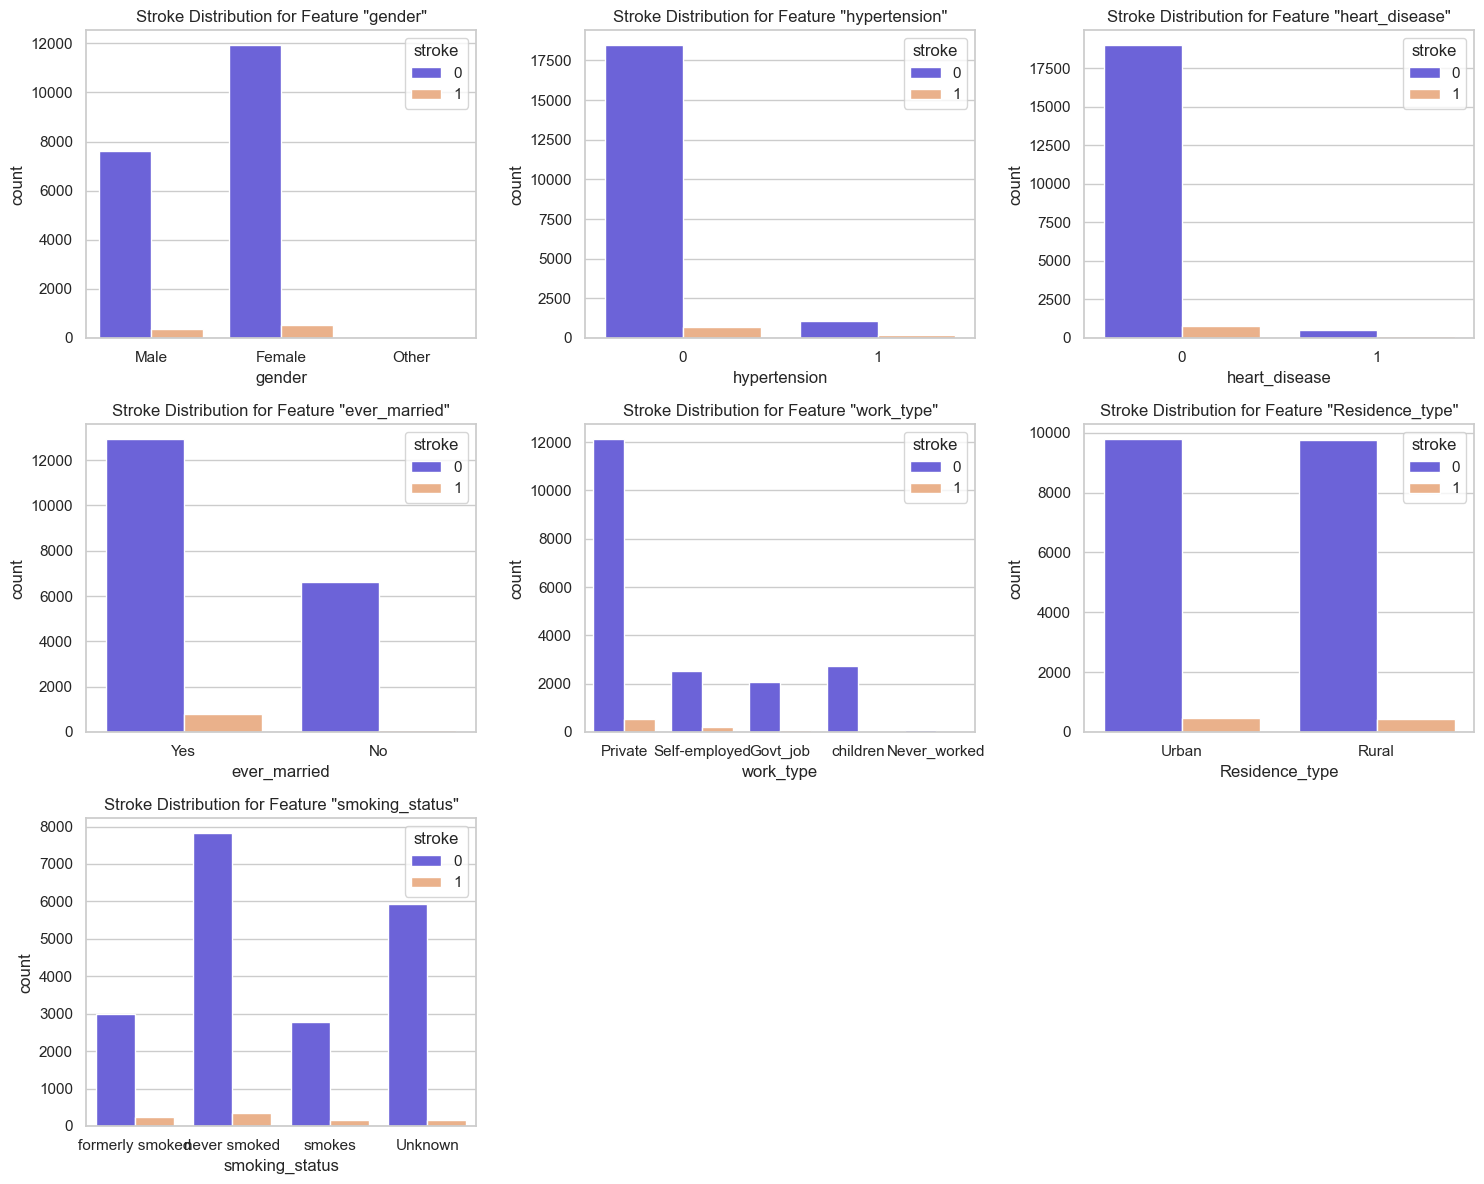

In [99]:
# Numerical features - histogram

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

numerical_features = ['age', 'avg_glucose_level', 'bmi']

plt.figure(figsize=(15, 8))

# Plot histograms for numerical features with different colors for stroke=0 and stroke=1
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[df['stroke'] == 0][feature], bins=30, kde=True, color='blue', label='Stroke = 0')
    sns.histplot(df[df['stroke'] == 1][feature], bins=30, kde=True, color='orange', label='Stroke = 1')
    plt.title(f'Stroke Distribution for Feature "{feature}"')
    plt.legend()

plt.tight_layout()
plt.show()


# Categorical features - bar chart

sns.set(style="whitegrid")

categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

plt.figure(figsize=(15, 12))

# Plot count plots for categorical features with different colors for stroke=0 and stroke=1
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=feature, data=df, hue='stroke', palette=['#5B4FEC',"#FAAE7B"])
    plt.title(f'Stroke Distribution for Feature "{feature}"')

plt.tight_layout()
plt.show()

### Visualizing distribution of features given the patient had stroke=1

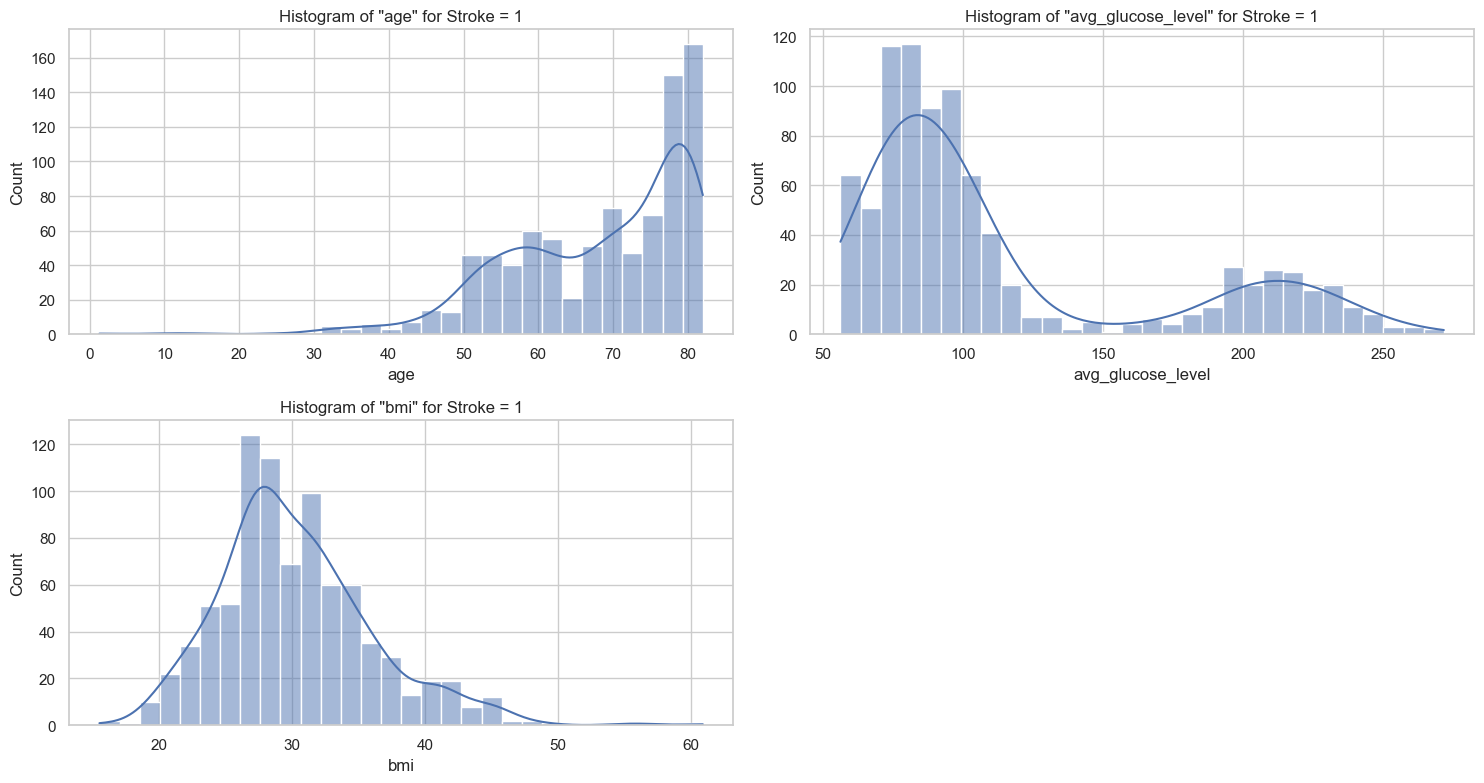

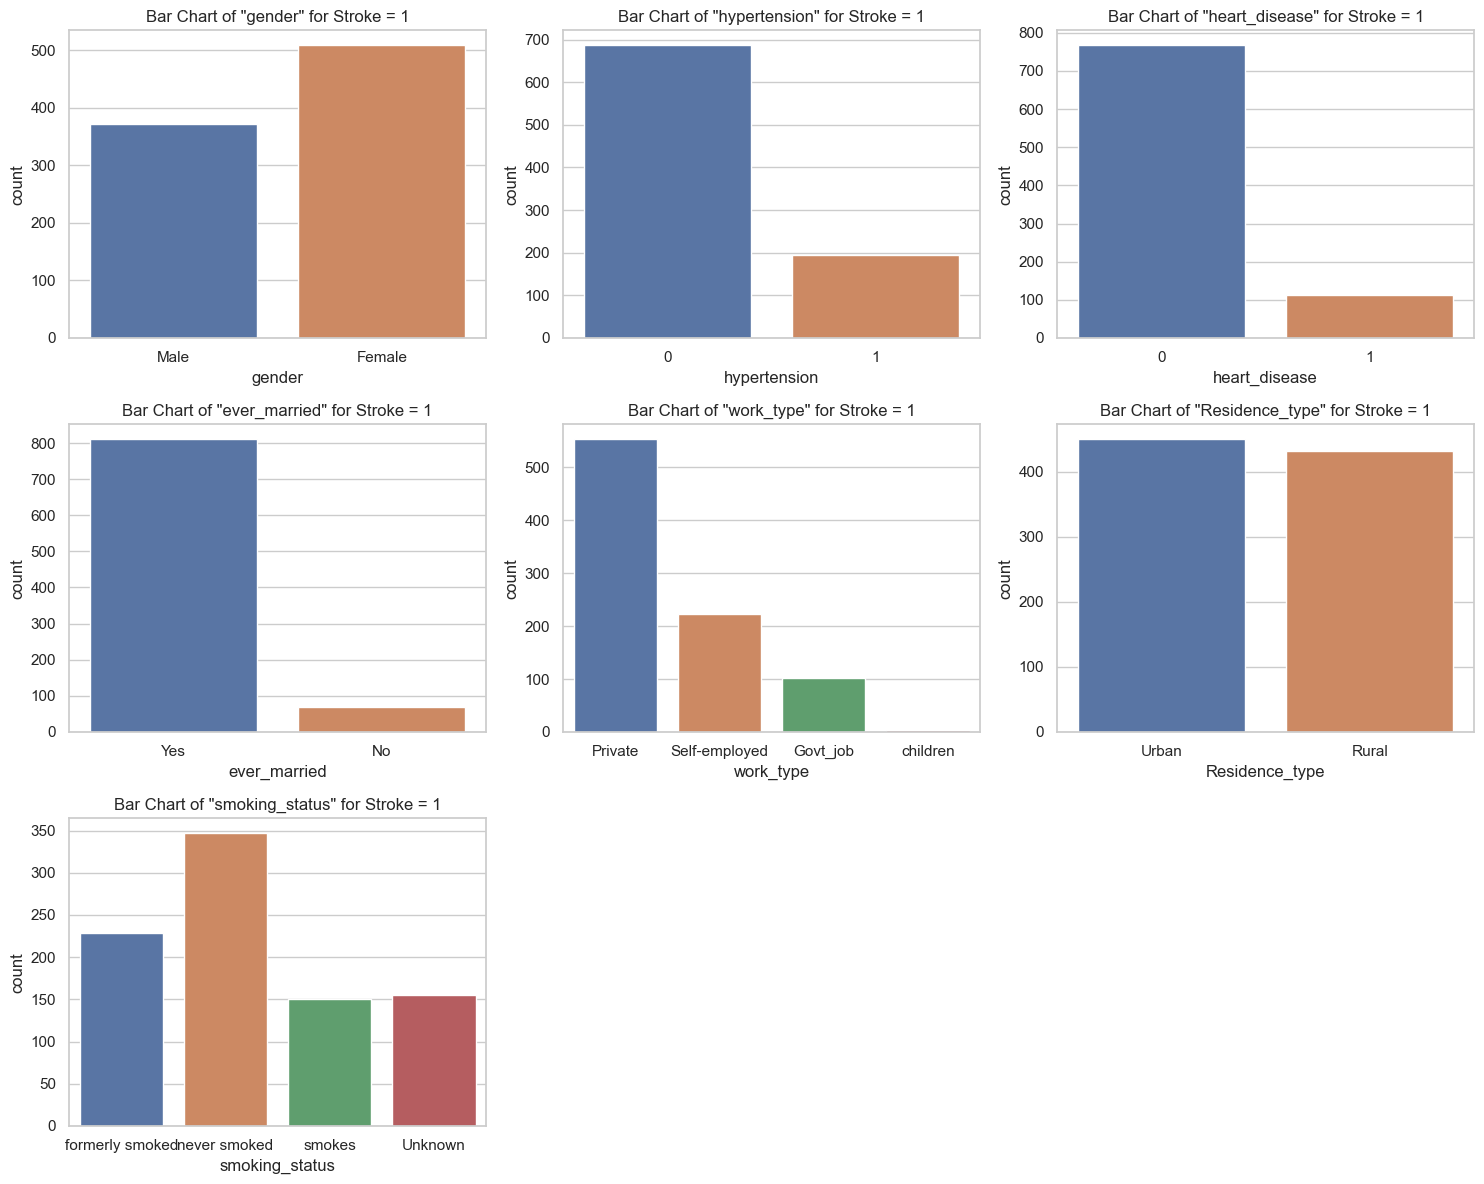

In [100]:
# Numerical features - histogram 

sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[df['stroke'] == 1][feature], bins=30, kde=True)
    plt.title(f'Histogram of "{feature}" for Stroke = 1')

plt.tight_layout()
plt.show()

# Categorical features - bar chart
plt.figure(figsize=(15, 12))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=feature, data=df[df['stroke'] == 1])
    plt.title(f'Bar Chart of "{feature}" for Stroke = 1')
    
plt.tight_layout()
plt.show()

## 2. Pre-processing the data

### Dropping rows with missing data

In [101]:
print("Dataset before processing:")
print("-" * 25)
print(f"Shape: {df.shape}\n")

print(df.astype('object').describe(include='all').loc['unique', :])
print()
print()

print("Dataset after processing:")
print("-" * 25)

df = df[df.smoking_status != "Unknown"]
print(f"Shape after filtering out 'Unknown' values from smoking_status: {df.shape}")

df = df.dropna()
print(f"Shape after dropping NA values: {df.shape}\n")

print(df.astype('object').describe(include='all').loc['unique', :])

Dataset before processing:
-------------------------
Shape: (20414, 12)

id                    19309
gender                    3
age                   106.0
hypertension              2
heart_disease             2
ever_married              2
work_type                 5
Residence_type            2
avg_glucose_level    4644.0
bmi                   440.0
smoking_status            4
stroke                    2
Name: unique, dtype: object


Dataset after processing:
-------------------------
Shape after filtering out 'Unknown' values from smoking_status: (14327, 12)
Shape after dropping NA values: (14187, 12)

id                    13712
gender                    3
age                    82.0
hypertension              2
heart_disease             2
ever_married              2
work_type                 5
Residence_type            2
avg_glucose_level    4053.0
bmi                   406.0
smoking_status            3
stroke                    2
Name: unique, dtype: object


### Standardizing numerical data

In [102]:
from sklearn.preprocessing import StandardScaler

num_cols = df.columns[df.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
num_cols = num_cols.delete([0, 2, 3, 6])
print(f"numerical data to standardize: {num_cols}\n")

scaler = StandardScaler()

df[num_cols] = scaler.fit_transform(df[num_cols])
print(df.head())

numerical data to standardize: Index(['age', 'avg_glucose_level', 'bmi'], dtype='object')

      id  gender       age  hypertension  heart_disease ever_married  \
0   9046    Male  1.091476             0              1          Yes   
2  31112    Male  1.816131             0              1          Yes   
3  60182  Female  0.088109             0              0          Yes   
4   1665  Female  1.760388             1              0          Yes   
5  56669    Male  1.871874             0              0          Yes   

       work_type Residence_type  avg_glucose_level       bmi   smoking_status  \
0        Private          Urban           3.922342  1.080068  formerly smoked   
2        Private          Rural           0.342755  0.443161     never smoked   
3        Private          Urban           2.246989  0.738313           smokes   
4  Self-employed          Rural           2.331253 -0.877257     never smoked   
5        Private          Urban           2.683759 -0.100541  formerly 

### One-hot encoding categorical features

In [103]:
df = pd.get_dummies(df, columns=['gender', 'work_type', 'Residence_type', 'smoking_status'],  dtype=int)
df.replace({"Yes": 1, "No": 0}, inplace=True)

print(df.head())

      id       age  hypertension  heart_disease  ever_married  \
0   9046  1.091476             0              1             1   
2  31112  1.816131             0              1             1   
3  60182  0.088109             0              0             1   
4   1665  1.760388             1              0             1   
5  56669  1.871874             0              0             1   

   avg_glucose_level       bmi  stroke  gender_Female  gender_Male  ...  \
0           3.922342  1.080068       1              0            1  ...   
2           0.342755  0.443161       1              0            1  ...   
3           2.246989  0.738313       1              1            0  ...   
4           2.331253 -0.877257       1              1            0  ...   
5           2.683759 -0.100541       1              0            1  ...   

   work_type_Govt_job  work_type_Never_worked  work_type_Private  \
0                   0                       0                  1   
2                   0 

## 3. Dataset correlation exploration

### Feature correlation heatmap

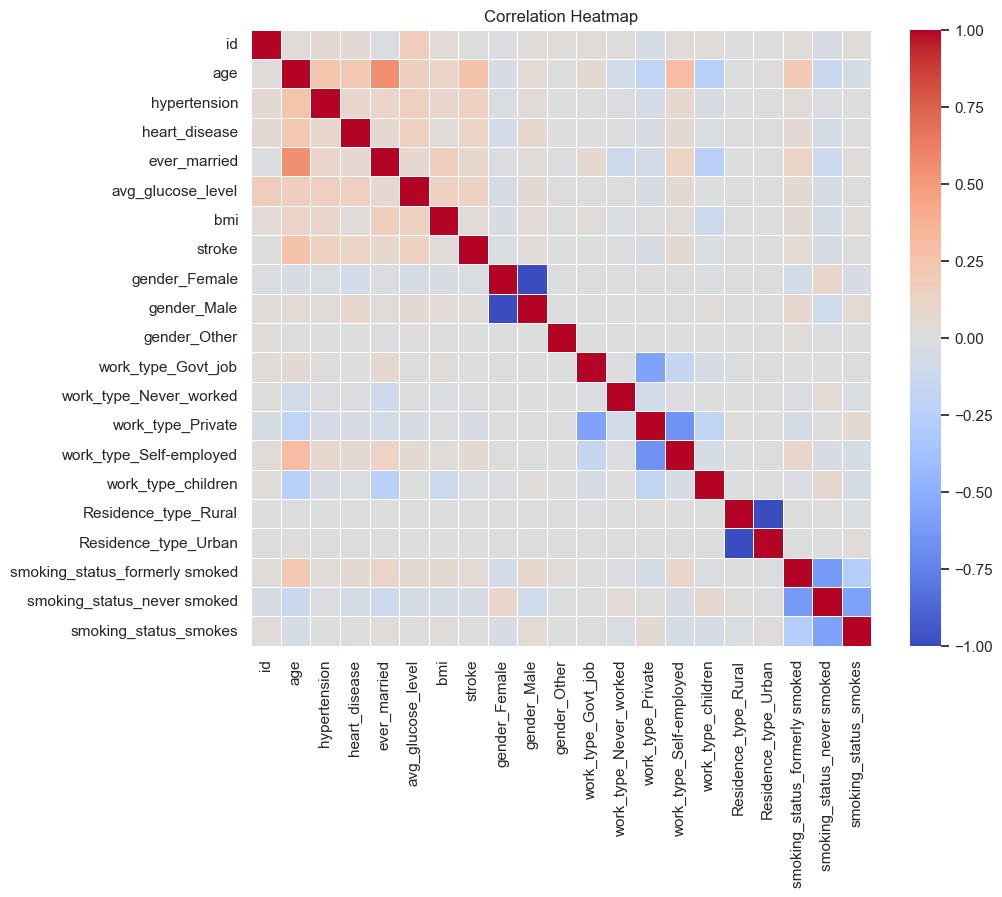

In [104]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Feature correlation with stroke likelihood

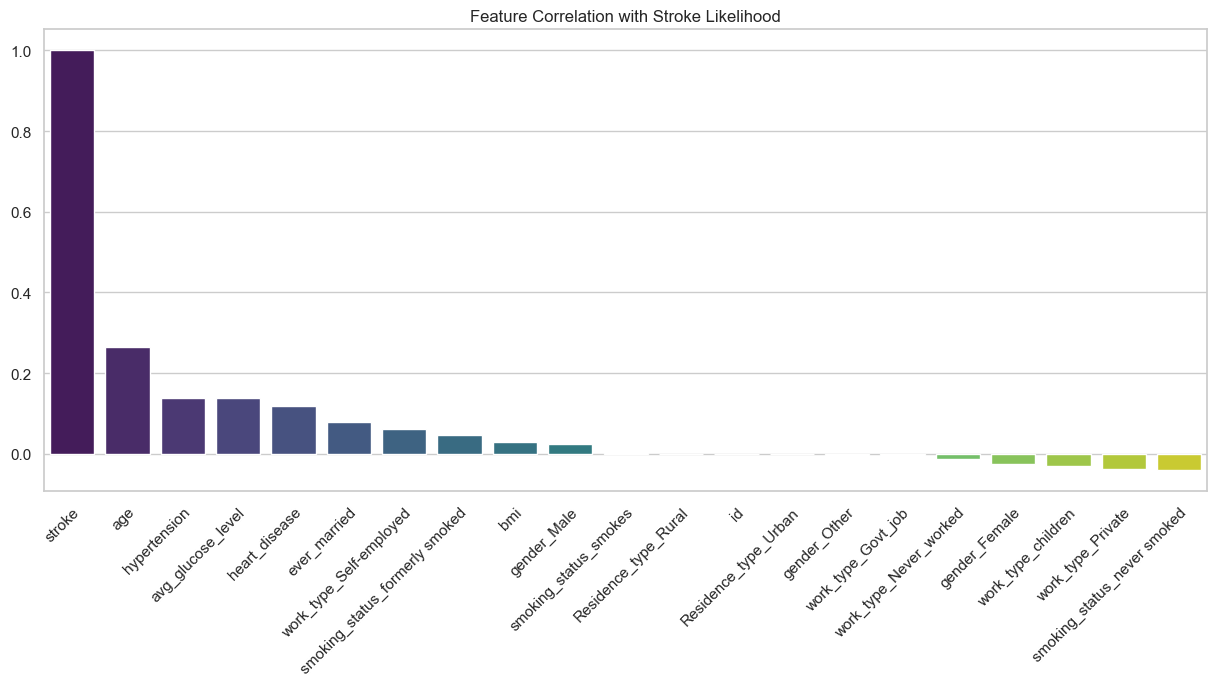

In [105]:
correlation_with_target = correlation_matrix['stroke'].sort_values(ascending=False)

plt.figure(figsize=(15, 6))

sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='viridis')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.title('Feature Correlation with Stroke Likelihood')
plt.show()

### Plotting the distribution of stroke = 0 and stroke = 1.
There's a heavy class imbalance in the dataset favoring the majority class, stroke = 0.

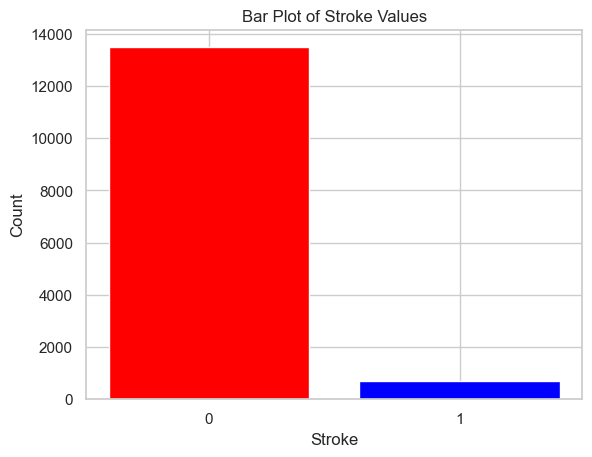

In [106]:
stroke_counts = df['stroke'].value_counts()

# Create a bar plot
plt.bar(stroke_counts.index, stroke_counts.values, color=['red', 'blue'])

# Add labels and title
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.xticks([0, 1])
plt.title('Bar Plot of Stroke Values')

# Show the plot
plt.show()

## 4. Train-test-weight split + synthetic sampling for class imbalance mitigation

In [107]:
from sklearn.model_selection  import train_test_split
from sklearn.utils import class_weight
import time

weights = class_weight.compute_class_weight('balanced', classes=[0, 1], y=df['stroke'])

w = [weights[0] if stroke == 0 else weights[1] for stroke in df['stroke']]
y = df.pop('stroke')
X = df.to_numpy()

seed = np.random.seed(int(time.time()))
X_tr, X_te, y_tr, y_te, w_tr, w_te = train_test_split(X, y, w, test_size=0.2, random_state=seed)

print(len(X_tr), len(X_te), len(y_tr), len(y_te), len(w_tr), len(w_te))

11349 2838 11349 2838 11349 2838


### Generating synthetically sampled data for training using SMOTE in order to mitigate the negative effect originating from the strong class imbalance.
Ref: https://towardsdatascience.com/applying-smote-for-class-imbalance-with-just-a-few-lines-of-code-python-cdf603e58688


In [119]:
from imblearn.over_sampling import SMOTE

def smote_sample(X_tr, y_tr):
    sm = SMOTE(random_state=seed)

    # Synethetic sampling - balancing the minority class with the majority class by generating extra synthetic samples for training
    X_res, y_res = sm.fit_resample(X_tr, y_tr)
    return X_res, y_res

X_res, y_res = smote_sample(X_tr, y_tr)
print(f"SMOTE synethetically sampled data - X.shape: {X_res.shape}, y.shape: {y_res.shape}")

SMOTE synethetically sampled data - X.shape: (21582, 20), y.shape: (21582,)


## 5. Model Exploration

### Defining model evaluation metrics & functions

In [136]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix, auc, precision_recall_curve

def weight_accuracy(predicted_y, true_y, weight):
    sum_weighted_correct_predictions = 0
    for yhat, y, w in zip(predicted_y, true_y, weight):
        if yhat == y:
            sum_weighted_correct_predictions += (1 * w)

    total_weight = sum(weight)
    return sum_weighted_correct_predictions / total_weight


def eval_model(predicted_y, true_y, weight):
    # Calculate precision, recall, and f1 score (useful for problems w/ class imbalances)
    precision = precision_score(true_y, predicted_y, sample_weight=weight)
    recall = recall_score(true_y, predicted_y, sample_weight=weight)
    f1 = f1_score(true_y, predicted_y, sample_weight=weight)
    weighted_accuracy = weight_accuracy(true_y, predicted_y, weight)

    # Print metrics
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Weighted accuracy:", weighted_accuracy)

    print("-" * 20)
    
    # Print classification report and confusion matrix
    print("Classification Report:\n", classification_report(true_y, predicted_y, sample_weight=weight))
    print("\nConfusion Matrix:\n", confusion_matrix(true_y, predicted_y, sample_weight=weight))

    # Graph PR-curve
    p, r, _ = precision_recall_curve(true_y, predicted_y, sample_weight=weight)
    pr_auc = auc(r, p)
    plt.figure(figsize=(8, 8))
    plt.plot(r, p, color='darkorange', lw=2, label='PR curve (area = {:.2f})'.format(pr_auc))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower right')
    plt.show()

### A. Logistic Regression

In [147]:
from sklearn.linear_model import LogisticRegression

def do_logistic_regression(X_tr, y_tr, X_te, y_te, w_te):
    logistic_regression_model = LogisticRegression()

    # Train the model
    logistic_regression_model.fit(X_tr, y_tr)
    y_pred_te = logistic_regression_model.predict(X_te)

    # Training weighted accuracy
    y_pred_tr = logistic_regression_model.predict(X_tr)
    print(f"Training accuracy: {weight_accuracy(y_pred_tr, y_tr, w_tr)}")

    # Validation weighted accuracy
    y_pred_te = logistic_regression_model.predict(X_te)
    print(f"Validation accuracy: {weight_accuracy(y_pred_te, y_te, w_te)}")

    print(f"Score: {logistic_regression_model.score(X_te, y_te, sample_weight=w_te)}\n")
    eval_model(y_pred_te, y_te, w_te)

#### An example of poor accuracy (will happen to all models) due to the majority/minority class imbalance issue

High precision, low recall.

Training accuracy: 0.5163345784080016
Validation accuracy: 0.507045085961975
Score: 0.5070450859619545

Precision: 0.9503771058010854
Recall: 0.034246575342465765
F1 Score: 0.066110864040505
Weighted accuracy: 0.507045085961975
--------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67 1416.2799080323714
           1       0.95      0.03      0.07 1471.095170454545

    accuracy                           0.51 2887.375078486916
   macro avg       0.72      0.52      0.37 2887.375078486916
weighted avg       0.73      0.51      0.36 2887.375078486916


Confusion Matrix:
 [[1413.64937328    2.63053475]
 [1420.71519886   50.37997159]]


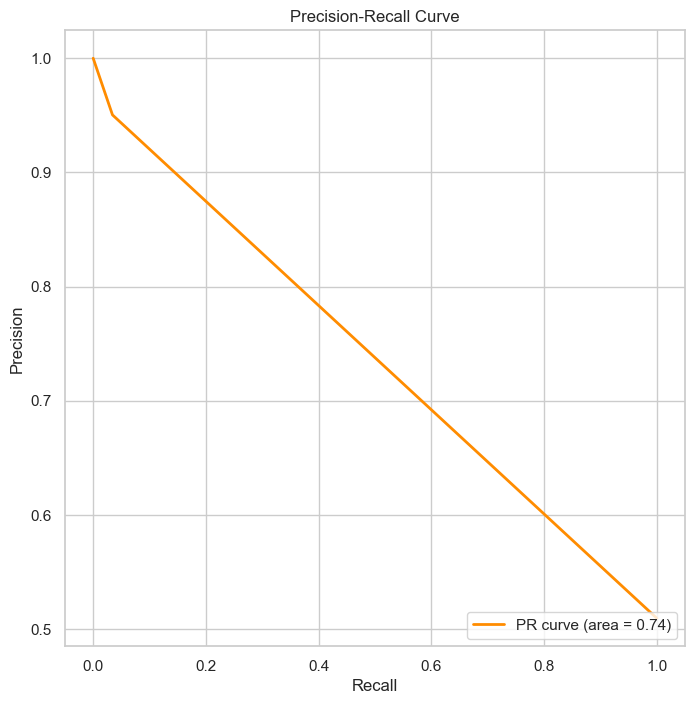

In [148]:
do_logistic_regression(X_tr, y_tr, X_te, y_te, w_te)

#### Improved: Mitigating the class imbalance issue using SMOTE synthetic generated samples
Higher precision, recall, and weighted accuracy.

Training accuracy: 0.740645108210938
Validation accuracy: 0.7649979837906259
Score: 0.7649979837906081

Precision: 0.721768689274905
Recall: 0.876712328767124
F1 Score: 0.791731026221994
Weighted accuracy: 0.7649979837906259
--------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.65      0.73 1416.2799080323714
           1       0.72      0.88      0.79 1471.095170454545

    accuracy                           0.76 2887.375078486916
   macro avg       0.78      0.76      0.76 2887.375078486916
weighted avg       0.78      0.76      0.76 2887.375078486916


Confusion Matrix:
 [[ 919.10884076  497.17106727]
 [ 181.36789773 1289.72727273]]


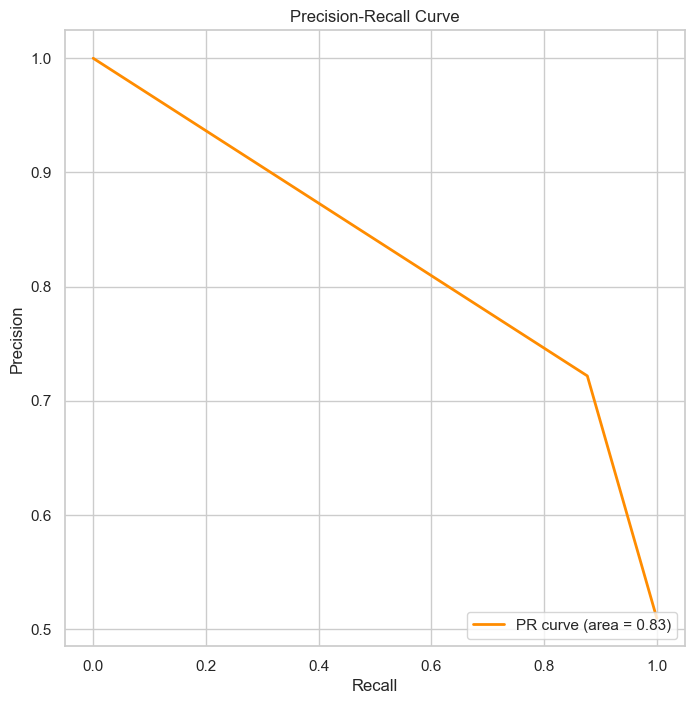

In [150]:
# Fitting the model using the synthetic samples
X_res, y_res = smote_sample(X_tr, y_tr)

do_logistic_regression(X_res, y_res, X_te, y_te, w_te)